In [18]:
import cv2
import matplotlib.pyplot as plt 

In [19]:
image = cv2.imread('output/extracted.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cap = cv2.imread('images/cap.png')
image.shape, cap.shape

((200, 600, 3), (220, 260, 3))

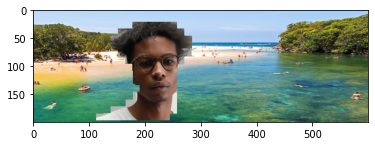

In [20]:
plt.imshow(image[:,:,::-1])

In [21]:
face_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
faces_coord = face_cascade.detectMultiScale(gray, 1.3, 5)

In [22]:
def draw(img, faces_coord):
    for (x, y, w, h) in faces_coord:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 4)

In [25]:
x,y,h,w = faces_coord[0]
x,y,w,h

(172, 54, 102, 102)

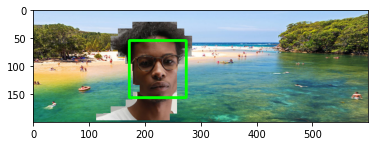

In [28]:
img = image.copy()
draw(img, faces_coord)
plt.imshow(img[:,:,::-1])

(102, 102, 3)


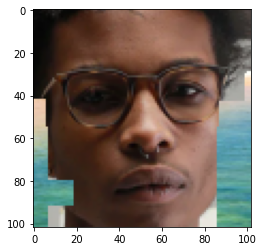

In [29]:
roi = image[y:y+h,x:x+w]
print(roi.shape)
plt.imshow(roi[:,:,::-1])

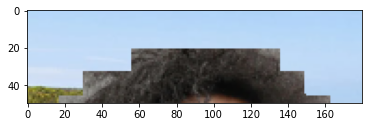

In [38]:
# selecting region of image for cap placement

img_roi = image[0:50, 172-50:172+130]
plt.imshow(img_roi[:,:,::-1])

In [39]:
img_roi.shape

(50, 180, 3)

# cap image resizing

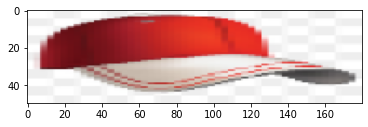

In [41]:
h,w = img_roi.shape[:2]
cap = cv2.resize(cap, (w,h), interpolation = cv2.INTER_AREA)
plt.imshow(cap[:,:,::-1])

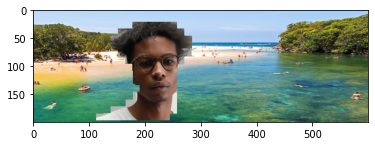

In [42]:
plt.imshow(image[:,:,::-1])

In [43]:
# create a mask of cap and inverted mask also 
img2gray = cv2.cvtColor(cap, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

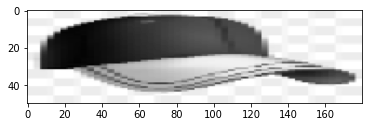

In [44]:
plt.imshow(img2gray, cmap='gray')

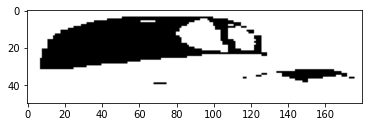

In [45]:
plt.imshow(mask, cmap='gray')

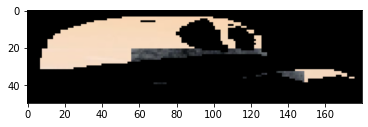

In [46]:
# Now black-out the area of cap in ROI
img1_bg = cv2.bitwise_and(img_roi,img_roi,mask = mask_inv)
plt.imshow(img1_bg)

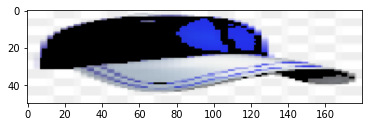

In [47]:
# Take only region of cap from cap image
img2fg = cv2.bitwise_and(cap, cap, mask=mask)
plt.imshow(img2fg)

In [50]:
# put the cap and modify the main image
dst = cv2.add(img1_bg, img2fg)
image[0:50, 172-50:172+130] = dst

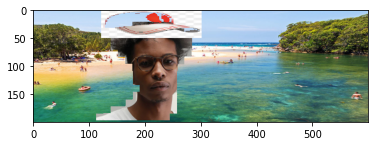

In [51]:
plt.imshow(image[:,:,::-1])